In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from pandas.tools.plotting import scatter_matrix
from sklearn import svm,preprocessing, cross_validation
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score, StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.cluster import KMeans
%matplotlib inline
sea.set()
from subprocess import check_output
print(check_output(["ls"]))

b'ensemble_python_voting.csv\ngender_submission.csv\nsubmit.csv\ntest.csv\nTitanic1.csv\ntitanic.ipynb\nTitanic.ipynb\ntrain .csv\nworkplace.ipynb\n'


In [266]:
df_train=pd.read_csv("train .csv")
df_test=pd.read_csv("test.csv")
y1=np.array(df_test.PassengerId[:])
y1=pd.Series(y1)
print(len(y1))
df_train.info()
print('___'*10)
df_test.info()
y=df_train['Survived']
IDtest = df_test["PassengerId"]

418
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
______________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null objec

In [267]:
df=df_train.copy()
df1=df_test.copy()
data_cleaner=[df,df1]


In [268]:
print("Traning->>>",df.isnull().sum())
print('___'*10)
print("test->>",df1.isnull().sum())
df.describe(include = 'all')
print('###'*10)
print(df['Ticket'].value_counts())

Traning->>> PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
______________________________
test->> PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
##############################
CA. 2343        7
347082          7
1601            7
347088          6
3101295         6
CA 2144         6
S.O.C. 14879    5
382652          5
2666            4
17421           4
4133            4
349909          4
347077          4
LINE            4
W./C. 6608      4
113760          4
113781          4
19950           4
PC 17757        4
C.A. 31921      3
230080          3
13502           3
239853          3
PC 17582        3
347742          3
37111

In [269]:
for dataset in data_cleaner:
    dataset['Age'].fillna(dataset['Age'].median(),inplace=True)
    dataset['Fare'].fillna(dataset['Fare'].median(),inplace=True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0],inplace=True)

drop_col=['Cabin','PassengerId','Ticket']
df.drop(drop_col,axis=1,inplace=True)
df1.drop(drop_col,axis=1,inplace=True)
print(df.isnull().sum())
print('###'*10)
print(df1.isnull().sum())
df.head()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
##############################
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [270]:
dataset.head()
df['Fare'].value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64

In [271]:
for dataset in data_cleaner:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1
    dataset['Alone']=1
    dataset['Alone'].loc[dataset['FamilySize']>1]=0


/home/meghanshu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [272]:
print(dataset['Embarked'].value_counts())

S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [273]:
for dataset in data_cleaner:
    dataset['SexP']=0 #female
    dataset['SexP'].loc[dataset['Sex']=='male']=1
    dataset['FareBin']=pd.qcut(dataset['Fare'],4)
    dataset['AgeBin']=pd.cut(dataset['Age'],5)
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    
title_min=10
title_name=(df['Title'].value_counts()<title_min)
df['Title']= df['Title'].apply(lambda x: 'Misc' if title_name.loc[x] == True else x)
print(df['Title'].value_counts())
print("-"*10)    
for dataset in data_cleaner:
    le=LabelEncoder()
    dataset['Embarked_code']=le.fit_transform(dataset['Embarked'])
    dataset['Title_code']=le.fit_transform(dataset['Title'])

    
for dataset in data_cleaner:
    dataset['Title_code']=le.fit_transform(dataset['Title'])
data_df=['Sex','Age','Embarked','Fare','SibSp','Parch','FamilySize','Alone']#Charts
data_cal=['SexP','Pclass', 'Embarked_code', 'Title_code','SibSp', 'Parch', 'Age', 'Fare']#Cal


/home/meghanshu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------


In [274]:
Target=['Survived']
data_Continous=Target+data_df


In [275]:
data_Bin=['SexP','Pclass','Embarked_code','Title_code','FareBin','AgeBin','FamilySize']
data_x_Bin=Target+data_Bin
print(data_x_Bin)

['Survived', 'SexP', 'Pclass', 'Embarked_code', 'Title_code', 'FareBin', 'AgeBin', 'FamilySize']


In [276]:
data_df_dummy=pd.get_dummies(df[data_df])
#print("data_df_dummy",data_df_dummy)
print('____'*10)
data_xdf_dummy=data_df_dummy.columns.tolist()
#print("data_xdf_dummy",data_xdf_dummy)
print('____'*10)
data_xydf_dummy=Target+data_xdf_dummy
print(data_xydf_dummy)

________________________________________
________________________________________
['Survived', 'Age', 'Fare', 'SibSp', 'Parch', 'FamilySize', 'Alone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


#X=df.drop(['Survived','Sex','Name','Title','Embarked','Fare'],1)

#X_f=df1.drop(['Sex','Name','Title','Embarked','Fare'],1)
#X=df[data_cal]

print(X['Parch'].unique())
print(X['Parch'].value_counts())
#X.sample(10)


In [277]:
print('Train columns with null values: \n', df.isnull().sum())
print("-"*10)
print (df.info())
print("-"*10)

print('Test/Validation columns with null values: \n', df1.isnull().sum())
print("-"*10)
print (df1.info())
print("-"*10)

df_train.describe(include = 'all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
Alone            0
SexP             0
FareBin          0
AgeBin           0
Title            0
Embarked_code    0
Title_code       0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
Alone            891 non-null int64
SexP             891 non-null int64
FareBin          891 non-null category
AgeBin           891 non-null catego

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Moubarek, Master. Gerios",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [278]:
X_train,X_test,y_train,y_test=train_test_split(df[data_cal],y,test_size=0.2,random_state=0)

In [279]:
#graphs and realtions
for x in data_df:
    if df[x].dtype!='float64':
        print("corealtion are ::", x)
        print(df[[x,Target[0]]].groupby(x,as_index=False).mean())
        print('__'*10)

        
print(pd.crosstab(df['Title'],df[Target[0]]))
        

corealtion are :: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
____________________
corealtion are :: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
____________________
corealtion are :: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
____________________
corealtion are :: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
____________________
corealtion are :: FamilySize
   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000
____________________
corealtion are :: Alone
   Alone  Survived
0      0  0.505650
1      1  0.303538


In [280]:
print(df.info())
print('__'*10)
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
Alone            891 non-null int64
SexP             891 non-null int64
FareBin          891 non-null category
AgeBin           891 non-null category
Title            891 non-null object
Embarked_code    891 non-null int64
Title_code       891 non-null int64
dtypes: category(2), float64(2), int64(9), object(4)
memory usage: 106.4+ KB
None
____________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
Pclass           418 non-null int64
Name             418 non-

In [281]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 140 to 684
Data columns (total 8 columns):
SexP             712 non-null int64
Pclass           712 non-null int64
Embarked_code    712 non-null int64
Title_code       712 non-null int64
SibSp            712 non-null int64
Parch            712 non-null int64
Age              712 non-null float64
Fare             712 non-null float64
dtypes: float64(2), int64(6)
memory usage: 50.1 KB


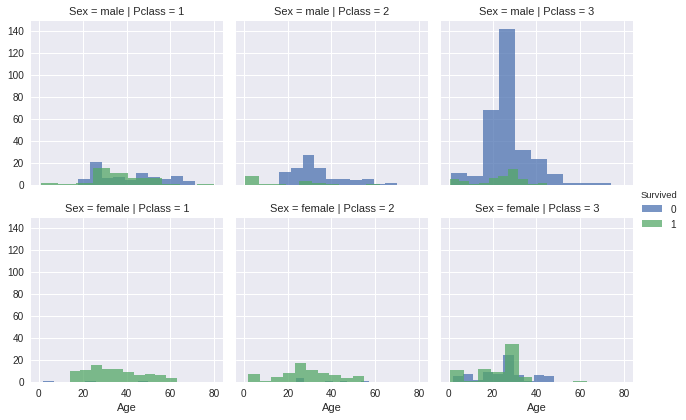

In [282]:
#### distribution age
h=sea.FacetGrid(df,row='Sex',col='Pclass',hue='Survived',aspect=1)
h.map(plt.hist,'Age',alpha=.75)
h.add_legend()

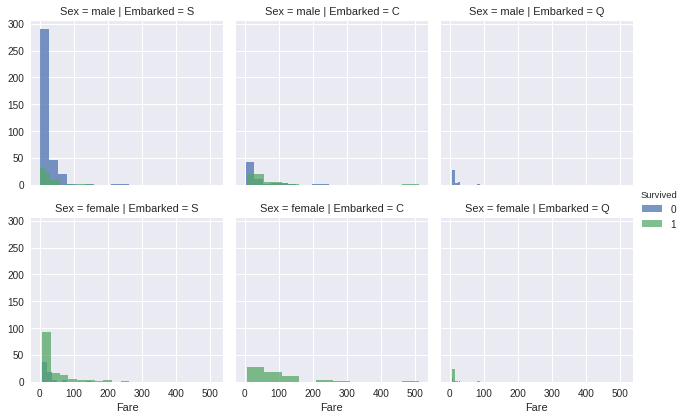

In [283]:
#### distribution age
h=sea.FacetGrid(df,row='Sex',col='Embarked',hue='Survived',aspect=1)
h.map(plt.hist,'Fare',alpha=.75)
h.add_legend()

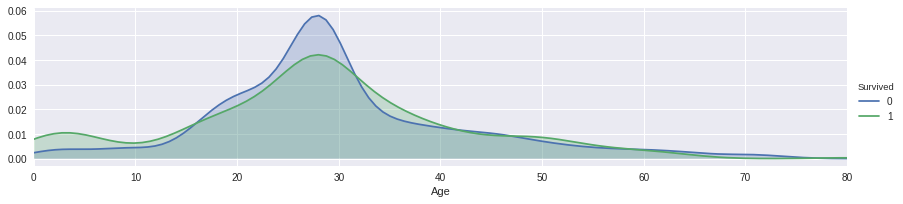

In [284]:
a=sea.FacetGrid(df,hue='Survived',aspect=4)
a.map(sea.kdeplot,'Age',shade=True)
a.set(xlim=(0,df['Age'].max()))
a.add_legend()

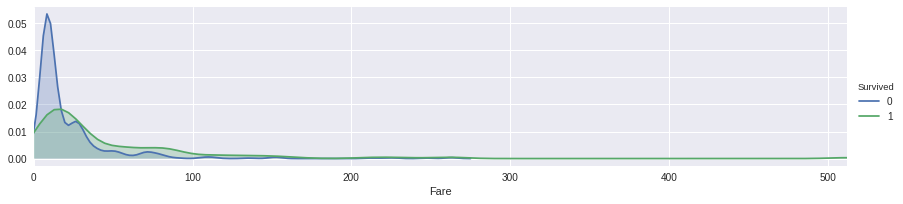

In [285]:
a=sea.FacetGrid(df,hue='Survived',aspect=4)
a.map(sea.kdeplot,'Fare',shade=True)
a.set(xlim=(0,df['Fare'].max()))
a.add_legend()

In [286]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

In [287]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())




In [288]:
cv_results=[]
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,df[data_cal],y,scoring="accuracy",cv=kfold,n_jobs=-1))
    
cv_means=[]
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())


In [289]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

/home/meghanshu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


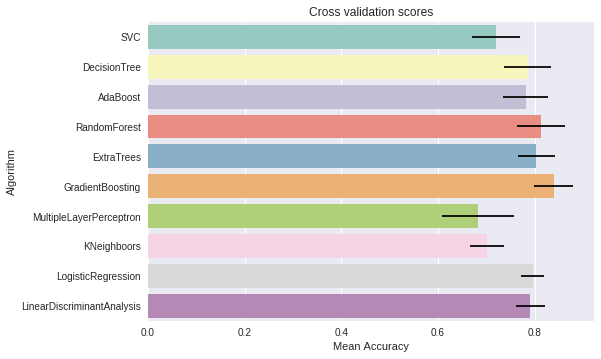

In [290]:
g = sea.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

I decided to choose the SVC, AdaBoost, RandomForest , ExtraTrees and the GradientBoosting classifiers for the ensemble modeling.

6.1.2 Hyperparameter tunning for best models
I performed a grid search optimization for AdaBoost, ExtraTrees , RandomForest, GradientBoosting and SVC classifiers.

I set the "n_jobs" parameter to 4 since i have 4 cpu . The computation time is clearly reduced.

But be carefull, this step can take a long time, i took me 15 min in total on 4 cpu.

In [291]:
### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC=DecisionTreeClassifier()
adaDTC=AdaBoostClassifier(DTC, random_state=7)
ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}


gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsadaDTC.fit(df[data_cal],y)

ada_best=gsadaDTC.best_estimator_


Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:    2.2s finished


In [292]:
a=gsadaDTC.grid_scores_
print(len(a))

112


/home/meghanshu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [293]:
gsadaDTC.best_score_

0.8058361391694725

In [294]:
ExtC=ExtraTreesClassifier()

#search grid for optimal parameters

ex_param_grid={"max_depth": [None],
              "max_features": ["auto"],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}



gsExtC=GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, 
                    scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(df[data_cal],y)
ExtC_best=gsExtC.best_estimator_
gsExtC.best_score_

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:   15.3s finished


0.83613916947250277


X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
#clf=KMeans(n_clusters=2)
clf = svm.SVC(kernel='rbf', C=5, gamma=0.01)
clf.fit(X_train,y_train)
#a=clf.predict(X_f)
#accuracy=pd.Series(a)
#print(len(a))
#frame={'PassengerId':y1,'Survived':a}
#dframe = pd.DataFrame(frame)
#dframe.to_csv('Titanic12.csv')
accuracy = clf.score(X_test, y_test)
print(accuracy)
#X_test.info()
#print(len(y1))

In [295]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(df[data_cal],y)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   15.5s finished


0.83501683501683499

In [296]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(df[data_cal],y)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   18.4s finished


0.80920314253647585

6.1.3 Plot learning curves
Learning curves are a good way to see the overfitting effect on the training set and the effect of the training size on the accuracy.

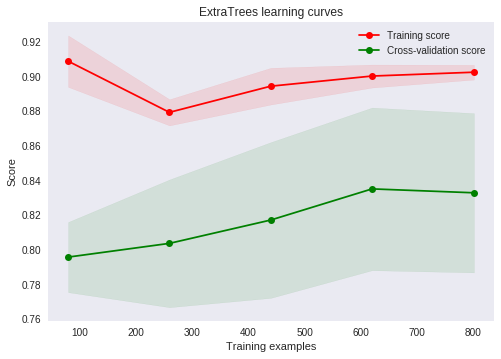

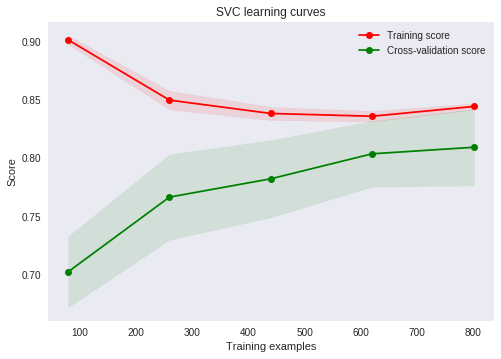

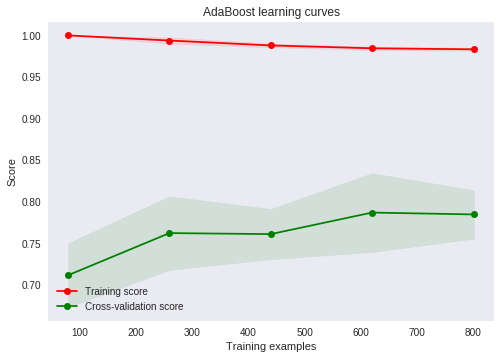

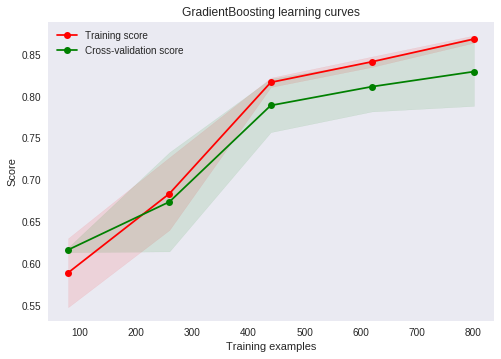

In [297]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

#g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",df[data_cal],y,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",df[data_cal],y,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",df[data_cal],y,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",df[data_cal],y,cv=kfold)

GradientBoosting and Adaboost classifiers tend to overfit the training set. According to the growing cross-validation curves GradientBoosting and Adaboost could perform better with more training examples.

SVC and ExtraTrees classifiers seem to better generalize the prediction since the training and cross-validation curves are close together.

6.1.4 Feature importance of tree based classifiers
In order to see the most informative features for the prediction of passengers survival, i displayed the feature importance for the 4 tree based classifiers.

/home/meghanshu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


AttributeError: 'SVC' object has no attribute 'feature_importances_'

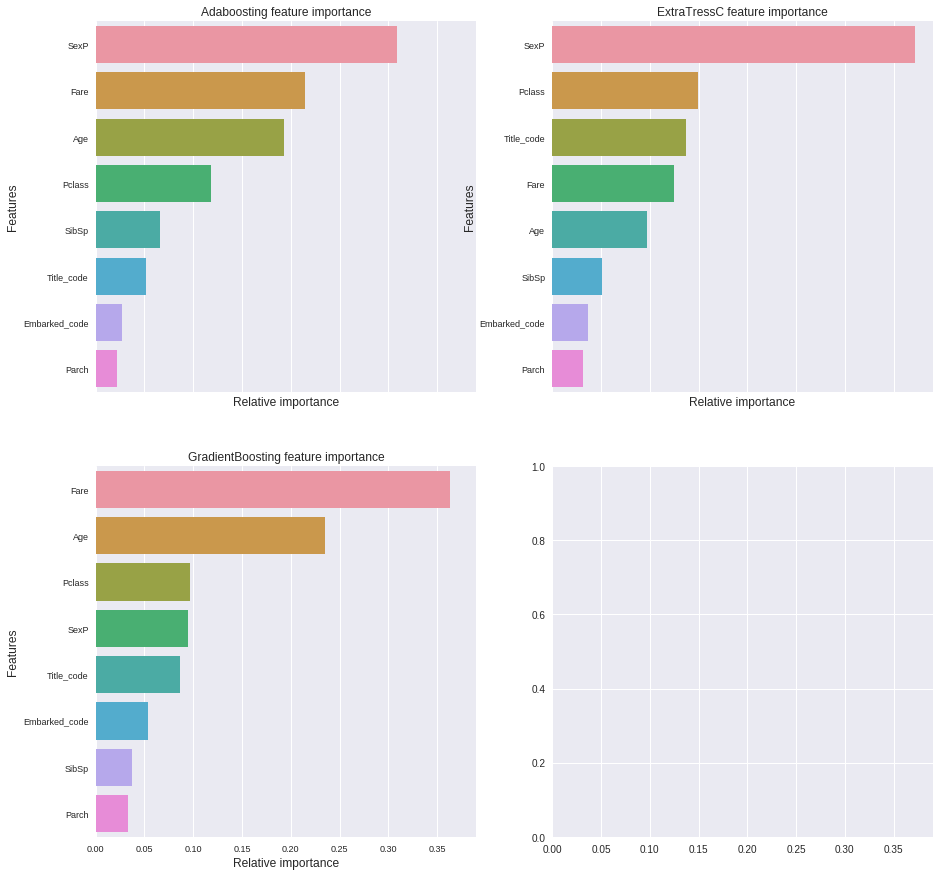

In [298]:
nrows=ncols=2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))
name_classifier=[("Adaboosting",ada_best),("ExtraTressC",ExtC_best),("GradientBoosting",GBC_best),
                 ("SVC",SVMC_best)]

nclassifier=0
for row in range(nrows):
    for col in range(ncols):
        name=name_classifier[nclassifier][0]
        classifier=name_classifier[nclassifier][1]
        #print(name,classifier)
        #print(classifier.feature_importances_)
        indices=np.argsort(classifier.feature_importances_)[::-1][:40]
        #print(indices)
        g = sea.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1
        
plt.legend()

I plot the feature importance for the 4 tree based classifiers (Adaboost, ExtraTrees, RandomForest and GradientBoosting).

We note that the four classifiers have different top features according to the relative importance. It means that their predictions are not based on the same features. Nevertheless, they share some common important features for the classification , for example 'Fare', 'Title_2', 'Age' and 'Sex'.

Title_2 which indicates the Mrs/Mlle/Mme/Miss/Ms category is highly correlated with Sex.

We can say that:

Pc_1, Pc_2, Pc_3 and Fare refer to the general social standing of passengers.

Sex and Title_2 (Mrs/Mlle/Mme/Miss/Ms) and Title_3 (Mr) refer to the gender.

Age and Title_1 (Master) refer to the age of passengers.

Fsize, LargeF, MedF, Single refer to the size of the passenger family.

According to the feature importance of this 4 classifiers, the prediction of the survival seems to be more associated with the Age, the Sex, the family size and the social standing of the passengers more than the location in the boat.

In [ ]:
#test_Survived_RFC = pd.Series(RFC_best.predict(test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(df1[data_cal]), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(df1[data_cal]), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(df1[data_cal]), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(df1[data_cal]), name="GBC")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)


g= sea.heatmap(ensemble_results.corr(),annot=True)

The prediction seems to be quite similar for the 5 classifiers except when Adaboost is compared to the others classifiers.

The 5 classifiers give more or less the same prediction but there is some differences. Theses differences between the 5 classifier predictions are sufficient to consider an ensembling vote.

6.2 Ensemble modeling
6.2.1 Combining models
I choosed a voting classifier to combine the predictions coming from the 5 classifiers.

I preferred to pass the argument "soft" to the voting parameter to take into account the probability of each vote

In [ ]:
votingC = VotingClassifier(estimators=[('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(df[data_cal], y)

In [299]:
test_Survived = pd.Series(votingC.predict(df1[data_cal]), name="Survived")

results = pd.concat([IDtest,test_Survived],axis=1)

results.to_csv("ensemble_python_voting.csv",index=False)